In [1]:
# Imports
import os
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
N_JOBS = 6
SEED = 2016

DATA = "Super"

In [2]:
# Get data
train = pd.read_csv("raw_data/X_train.csv")
test = pd.read_csv("raw_data/X_test.csv")
y = pd.read_csv("raw_data/y.csv")
print("train : " + str(train.shape))
print("test : " + str(test.shape))
print("y : " + str(y.shape))

# Change columns order for ease of use
alldata = pd.concat([train, test], axis = 0)
alldata = pd.concat([alldata.ID, alldata.daytime, alldata.is_calmday, alldata.zone_id, alldata.station_id, alldata.pollutant, 
                     alldata.temperature, alldata.pressure, alldata.cloudcover, alldata.precipintensity, 
                     alldata.precipprobability, alldata.windspeed, alldata.windbearingcos, alldata.windbearingsin, 
                     alldata.roadinvdist, alldata.hlres_50, alldata.hlres_100, alldata.hlres_300, alldata.hlres_500, 
                     alldata.hlres_1000, alldata.hldres_50, alldata.hldres_100, alldata.hldres_300, alldata.hldres_500, 
                     alldata.hldres_1000, alldata.route_100, alldata.route_300, alldata.route_500, alldata.route_1000, 
                     alldata.industry_1000, alldata.port_5000, alldata.green_5000, alldata.natural_5000], axis = 1)

# Differentiate numerical features (minus the target) and categorical features
cat_features = alldata.select_dtypes(include = ["object"]).columns
print("Categorical features : " + str(len(cat_features)))
num_features = alldata.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(num_features)))

train : (448169, 33)
test : (300891, 33)
y : (448169, 2)
Categorical features : 1
Numerical features : 32


In [3]:
# Imputing NAs
print("NAs : " + str(alldata.isnull().values.sum()))
print(alldata.isnull().sum())
alldata.loc[:, "hlres_50"] = alldata.loc[:, "hlres_50"].fillna(0)
alldata.loc[:, "hlres_100"] = alldata.loc[:, "hlres_100"].fillna(0)
alldata.loc[:, "hlres_300"] = alldata.loc[:, "hlres_300"].fillna(0)
alldata.loc[:, "hlres_500"] = alldata.loc[:, "hlres_500"].fillna(0)
alldata.loc[:, "hlres_1000"] = alldata.loc[:, "hlres_1000"].fillna(0)
alldata.loc[:, "hldres_50"] = alldata.loc[:, "hldres_50"].fillna(0)
alldata.loc[:, "hldres_100"] = alldata.loc[:, "hldres_100"].fillna(0)
alldata.loc[:, "hldres_300"] = alldata.loc[:, "hldres_300"].fillna(0)
alldata.loc[:, "hldres_500"] = alldata.loc[:, "hldres_500"].fillna(0)
alldata.loc[:, "hldres_1000"] = alldata.loc[:, "hldres_1000"].fillna(0)
alldata.loc[:, "route_100"] = alldata.loc[:, "route_100"].fillna(0)
alldata.loc[:, "route_300"] = alldata.loc[:, "route_300"].fillna(0)
alldata.loc[:, "route_500"] = alldata.loc[:, "route_500"].fillna(0)
alldata.loc[:, "route_1000"] = alldata.loc[:, "route_1000"].fillna(0)
alldata.loc[:, "industry_1000"] = alldata.loc[:, "industry_1000"].fillna(0)
alldata.loc[:, "port_5000"] = alldata.loc[:, "port_5000"].fillna(0)
alldata.loc[:, "natural_5000"] = alldata.loc[:, "natural_5000"].fillna(0)
alldata.loc[:, "green_5000"] = alldata.loc[:, "green_5000"].fillna(0)

print("After NA imputing, remaining NAs : " + str(alldata.isnull().values.sum()))
print(alldata.shape)

NAs : 5831954
ID                        0
daytime                   0
is_calmday                0
zone_id                   0
station_id                0
pollutant                 0
temperature               0
pressure                  0
cloudcover                0
precipintensity           0
precipprobability         0
windspeed                 0
windbearingcos            0
windbearingsin            0
roadinvdist               0
hlres_50             630452
hlres_100            514029
hlres_300            514029
hlres_500            514029
hlres_1000           141020
hldres_50            365300
hldres_100           248877
hldres_300           248877
hldres_500           248877
hldres_1000               0
route_100            622492
route_300            381937
route_500            141020
route_1000                0
industry_1000        506069
port_5000            386196
green_5000           122309
natural_5000         246441
dtype: int64
After NA imputing, remaining NAs : 0
(749060, 33)

In [9]:
# Create time features
alldata["hour"] = (alldata["daytime"] + 1) % 24

alldata["dayOfYear"] = (alldata["daytime"] / 24) + 1
alldata.dayOfYear = alldata.dayOfYear.apply(int)

alldata["dayOfMonth"] = ((alldata["daytime"] / 24) + 1)  % 24
alldata.dayOfMonth = alldata.dayOfMonth.apply(int)

alldata["dayOfWeek"] = ((alldata["daytime"] / 24) + 1)  % 7
alldata.dayOfWeek = alldata.dayOfWeek.apply(int)

alldata["week"] = (alldata["daytime"] / (24 * 7)) + 1
alldata.week = alldata.week.apply(int)

alldata["month"] = (alldata["daytime"] / (24 * 7 * 4.5)) + 1
alldata.month = alldata.month.apply(int)

In [11]:
display(alldata.head())
display(alldata.tail())

,ID,daytime,is_calmday,zone_id,station_id,pollutant,temperature,pressure,cloudcover,precipintensity,...,industry_1000,port_5000,green_5000,natural_5000,hour,dayOfYear,dayOfMonth,dayOfWeek,week,month
0,0,72.000,False,0.000,16.000,NO2,9.490,1029.350,1.000,0.610,...,0.000,0.000,5172542.500,5172542.500,1.000,4,4,4,1,1
1,1,72.000,False,0.000,16.000,PM10,9.490,1029.350,1.000,0.610,...,0.000,0.000,5172542.500,5172542.500,1.000,4,4,4,1,1
2,2,73.000,False,0.000,16.000,NO2,8.220,1029.560,1.000,0.097,...,0.000,0.000,5172542.500,5172542.500,2.000,4,4,4,1,1
3,3,73.000,False,0.000,16.000,PM10,8.220,1029.560,1.000,0.097,...,0.000,0.000,5172542.500,5172542.500,2.000,4,4,4,1,1
4,4,74.000,False,0.000,16.000,NO2,7.580,1029.660,0.970,0.000,...,0.000,0.000,5172542.500,5172542.500,3.000,4,4,4,1,1


,ID,daytime,is_calmday,zone_id,station_id,pollutant,temperature,pressure,cloudcover,precipintensity,...,industry_1000,port_5000,green_5000,natural_5000,hour,dayOfYear,dayOfMonth,dayOfWeek,week,month
300886,749055,14251.000,False,5.000,19.000,PM10,16.900,1016.150,0.000,0.000,...,0.000,10633674.000,0.000,0.000,20.000,594,18,6,85,19
300887,749056,14252.000,False,5.000,19.000,PM10,16.330,1016.640,0.000,0.000,...,0.000,10633674.000,0.000,0.000,21.000,594,18,6,85,19
300888,749057,14253.000,False,5.000,19.000,PM10,15.770,1016.920,0.000,0.000,...,0.000,10633674.000,0.000,0.000,22.000,594,18,6,85,19
300889,749058,14254.000,False,5.000,19.000,PM10,15.330,1016.980,0.000,0.000,...,0.000,10633674.000,0.000,0.000,23.000,594,18,6,85,19
300890,749059,14255.000,False,5.000,19.000,PM10,14.810,1017.090,0.000,0.000,...,0.000,10633674.000,0.000,0.000,0.000,594,18,6,85,19


In [12]:
# Create season feature
alldata["season"] = alldata.daytime.copy()
alldata.loc[(alldata["daytime"] <= 920) | ((alldata["daytime"] > 7400) & (alldata["daytime"] <= 9560)), "season"] = 1 # winter
alldata.loc[((alldata["daytime"] > 920) & (alldata["daytime"] <= 3080)) | ((alldata["daytime"] > 9560) & (alldata["daytime"] <= 11720)), "season"] = 2 # spring
alldata.loc[((alldata["daytime"] > 3080) & (alldata["daytime"] <= 5240)) | ((alldata["daytime"] > 11720) & (alldata["daytime"] <= 13880)), "season"] = 3 # summer
alldata.loc[((alldata["daytime"] > 5240) & (alldata["daytime"] <= 7400)) | (alldata["daytime"] > 13880), "season"] = 4 # autumn

train = alldata.iloc[:train.shape[0], :]
test = alldata.iloc[train.shape[0]: , :]

[ 16.  17.  20.]


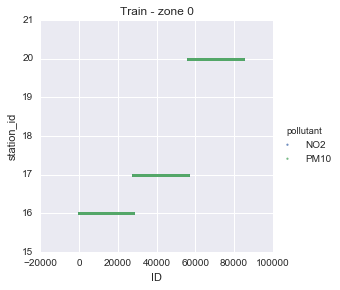

[ 21.  27.]


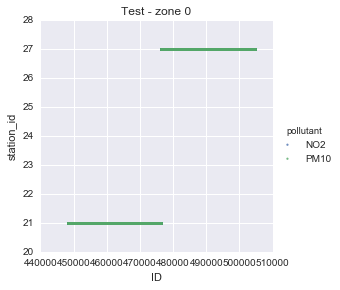

[  1.  18.  22.]


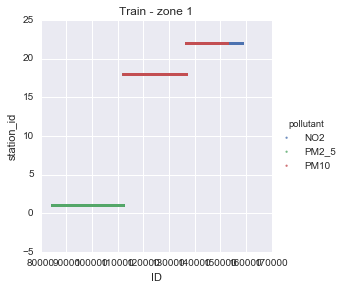

[  1.  29.]


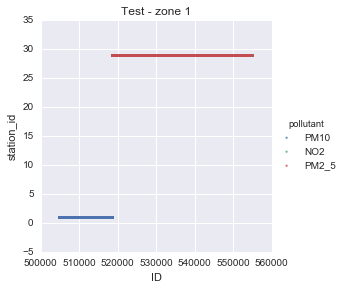

[ 26.  28.]


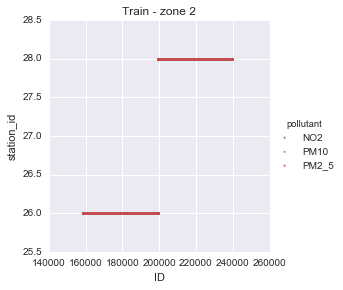

[ 15.]


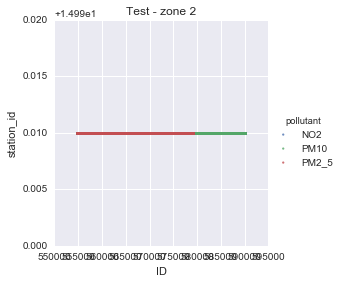

[  6.   9.  25.]


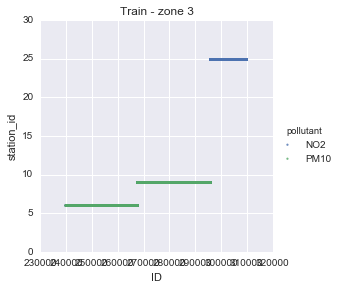

[ 12.  14.]


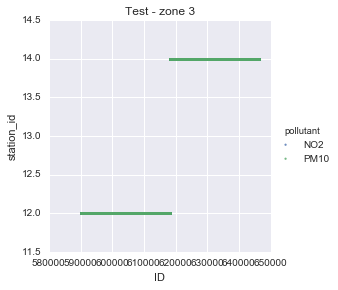

[  4.  10.  23.]


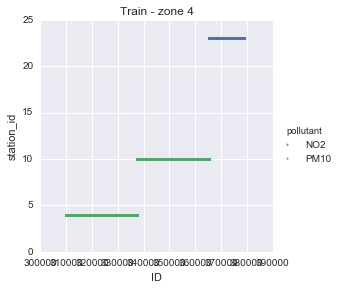

[ 0.  3.]


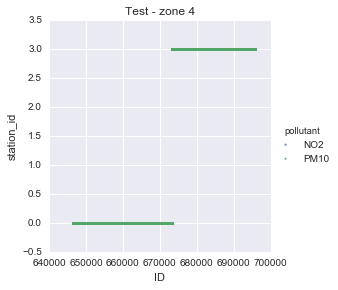

[  5.   8.  11.]


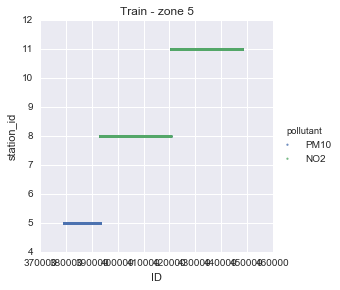

[  2.  13.  19.]


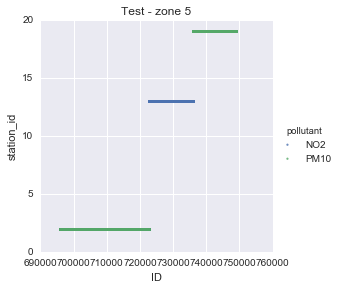

In [14]:
# Look at distributions of stations across train and test sets
print(np.unique(train.loc[train.zone_id == 0].station_id))
sns.lmplot(x = "ID", y = "station_id", data = train.loc[train.zone_id == 0], hue = "pollutant", fit_reg = False, scatter_kws={"s" : 5}, size = 4)
plt.title("Train - zone 0")
plt.show()
print(np.unique(test.loc[test.zone_id == 0].station_id))
sns.lmplot(x = "ID", y = "station_id", data = test.loc[test.zone_id == 0], hue = "pollutant", fit_reg = False, scatter_kws={"s" : 5}, size = 4)
plt.title("Test - zone 0")
plt.show()
print(np.unique(train.loc[train.zone_id == 1].station_id))
sns.lmplot(x = "ID", y = "station_id", data = train.loc[train.zone_id == 1], hue = "pollutant", fit_reg = False, scatter_kws={"s" : 5}, size = 4)
plt.title("Train - zone 1")
plt.show()
print(np.unique(test.loc[test.zone_id == 1].station_id))
sns.lmplot(x = "ID", y = "station_id", data = test.loc[test.zone_id == 1], hue = "pollutant", fit_reg = False, scatter_kws={"s" : 5}, size = 4)
plt.title("Test - zone 1")
plt.show()
print(np.unique(train.loc[train.zone_id == 2].station_id))
sns.lmplot(x = "ID", y = "station_id", data = train.loc[train.zone_id == 2], hue = "pollutant", fit_reg = False, scatter_kws={"s" : 5}, size = 4)
plt.title("Train - zone 2")
plt.show()
print(np.unique(test.loc[test.zone_id == 2].station_id))
sns.lmplot(x = "ID", y = "station_id", data = test.loc[test.zone_id == 2], hue = "pollutant", fit_reg = False, scatter_kws={"s" : 5}, size = 4)
plt.title("Test - zone 2")
plt.show()
print(np.unique(train.loc[train.zone_id == 3].station_id))
sns.lmplot(x = "ID", y = "station_id", data = train.loc[train.zone_id == 3], hue = "pollutant", fit_reg = False, scatter_kws={"s" : 5}, size = 4)
plt.title("Train - zone 3")
plt.show()
print(np.unique(test.loc[test.zone_id == 3].station_id))
sns.lmplot(x = "ID", y = "station_id", data = test.loc[test.zone_id == 3], hue = "pollutant", fit_reg = False, scatter_kws={"s" : 5}, size = 4)
plt.title("Test - zone 3")
plt.show()
print(np.unique(train.loc[train.zone_id == 4].station_id))
sns.lmplot(x = "ID", y = "station_id", data = train.loc[train.zone_id == 4], hue = "pollutant", fit_reg = False, scatter_kws={"s" : 5}, size = 4)
plt.title("Train - zone 4")
plt.show()
print(np.unique(test.loc[test.zone_id == 4].station_id))
sns.lmplot(x = "ID", y = "station_id", data = test.loc[test.zone_id == 4], hue = "pollutant", fit_reg = False, scatter_kws={"s" : 5}, size = 4)
plt.title("Test - zone 4")
plt.show()
print(np.unique(train.loc[train.zone_id == 5].station_id))
sns.lmplot(x = "ID", y = "station_id", data = train.loc[train.zone_id == 5], hue = "pollutant", fit_reg = False, scatter_kws={"s" : 5}, size = 4)
plt.title("Train - zone 5")
plt.show()
print(np.unique(test.loc[test.zone_id == 5].station_id))
sns.lmplot(x = "ID", y = "station_id", data = test.loc[test.zone_id == 5], hue = "pollutant", fit_reg = False, scatter_kws={"s" : 5}, size = 4)
plt.title("Test - zone 5")
plt.show()


In [15]:
# Split data by station for validation and ensembling
test_stats = [20, 18, 9, 10, 8]
testVal_stats = [17, 1, 25, 23, 5]

X_test = train[train.station_id.isin(test_stats)]
y_test = y[train.station_id.isin(test_stats)]
X_train = train[-train.station_id.isin(test_stats)]
y_train = y[-train.station_id.isin(test_stats)]

X_testVal = X_train[X_train.station_id.isin(testVal_stats)]
y_testVal = y_train[X_train.station_id.isin(testVal_stats)]
X_trainVal = X_train[-X_train.station_id.isin(testVal_stats)]
y_trainVal = y_train[-X_train.station_id.isin(testVal_stats)]


In [16]:
# Special case : split station 28 in 2 for X_test and X_testVal
trainValIdx = train[(train.station_id == 28) & (train.ID < 219467)].index
testValIdx = train[(train.station_id == 28) & (train.ID >= 219467)].index

X_test = X_test.append(train.loc[trainValIdx])
X_train = X_train.drop(train.index[[trainValIdx]])

y_test = y_test.append(y.loc[trainValIdx])
y_train = y_train.drop(y.index[[trainValIdx]])

X_testVal = X_testVal.append(train.loc[trainValIdx])
X_trainVal = X_trainVal.drop(train.index[[trainValIdx]])

y_testVal = y_testVal.append(y.loc[trainValIdx])
y_trainVal = y_trainVal.drop(y.index[[trainValIdx]])


In [17]:
# Remove ID and station_id fields to avoid overfitting
train = train.drop(["ID", "station_id"], axis = 1)
test = test.drop(["station_id"], axis = 1)
X_train = X_train.drop(["ID", "station_id"], axis = 1)
X_trainVal = X_trainVal.drop(["ID", "station_id"], axis = 1)
X_test = X_test.drop(["ID", "station_id"], axis = 1)
X_testVal = X_testVal.drop(["ID", "station_id"], axis = 1)

In [18]:
# Encode cat features
train = pd.get_dummies(train)
print(train.shape)
test = pd.get_dummies(test)
print(test.shape)
X_train = pd.get_dummies(X_train)
print(X_train.shape)
X_test = pd.get_dummies(X_test)
print(X_test.shape)
X_trainVal = pd.get_dummies(X_trainVal)
print(X_trainVal.shape)
X_testVal = pd.get_dummies(X_testVal)
print(X_testVal.shape)


(448169, 40)
(300891, 41)
(292046, 40)
(156123, 40)
(194060, 40)
(118210, 40)


In [19]:
# Write data in CSV files
train.to_csv("clean_data/train_" + DATA + ".csv", index = False)
y.to_csv("clean_data/y.csv", index = False)

X_train.to_csv("clean_data/X_train_" + DATA + ".csv", index = False)
y_train.to_csv("clean_data/y_train.csv", index = False)

X_trainVal.to_csv("clean_data/X_trainVal_" + DATA + ".csv", index = False)
y_trainVal.to_csv("clean_data/y_trainVal.csv", index = False)

test.to_csv("clean_data/test_" + DATA + ".csv", index = False)

X_test.to_csv("clean_data/X_test_" + DATA + ".csv", index = False)
y_test.to_csv("clean_data/y_test.csv", index = False)

X_testVal.to_csv("clean_data/X_testVal_" + DATA + ".csv", index = False)
y_testVal.to_csv("clean_data/y_testVal.csv", index = False)

test.ID.to_csv("clean_data/testID.csv", index = False, header = False)
